In [1]:
import pickle
import os
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
from ipywidgets import *
from IPython.display import display

plt.rcParams["figure.figsize"] = (10, 6)

In [2]:
cifar_folder = 'cifar-10-batches-py'

labels_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 
    'frog', 'horse', 'ship', 'truck']
label_count = len(labels_names)
print(labels_names)

def load_cifar_batch(folder, file):
    with open(os.path.join(folder, file), 'rb') as f:
        dict = pickle.load(f, encoding='bytes')
    print(dict[b'batch_label'])
    return dict[b'data'], np.array(dict[b'labels'])

def load_cifar(folder):
    x_tr = list()
    y_tr = list()
    for i in range(1, 6):
        x, y = load_cifar_batch(folder, 'data_batch_' + str(i))
        x_tr.append(x)
        y_tr.append(y)
    x_tr = np.concatenate(x_tr)
    y_tr = np.concatenate(y_tr)
    x_te, y_te = load_cifar_batch(folder, 'test_batch')
    return x_tr, y_tr, x_te, y_te

x_tr, y_tr, x_te, y_te = load_cifar(cifar_folder)
print(x_tr.shape, y_tr.shape, x_te.shape, y_te.shape)

['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
b'training batch 1 of 5'
b'training batch 2 of 5'
b'training batch 3 of 5'
b'training batch 4 of 5'
b'training batch 5 of 5'
b'testing batch 1 of 1'
(50000, 3072) (50000,) (10000, 3072) (10000,)


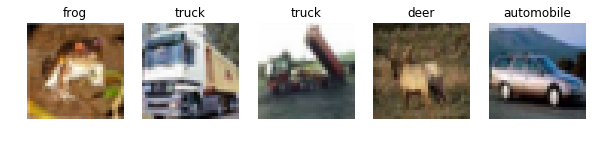

In [3]:
def plot_image(x, y):
    plt.imshow(x.reshape(3, 32, 32).transpose(1, 2, 0) / 256)
    plt.title(labels_names[y])
    plt.axis('off')

def show_image(x, y):
    plot_image(x, y)
    plt.show()

def show_images(xs, ys):
    n = len(xs)
    for i in range(n):
        plt.subplot(1, n, i + 1)
        plot_image(xs[i], ys[i])
    plt.show()
    
show_images(x_tr[:5], y_tr[:5])

In [5]:
def show_train_images(index):
    show_images(x_tr[index:index+5], y_tr[index:index+5])

silence = interact(show_train_images, index=widgets.IntSlider(min=0, max=100, step=5, value=0))

A Jupyter Widget

In [6]:
def show_train_images(index):
    show_images(x_tr[index:index+5], y_tr[index:index+5])

silence = interact(show_train_images, 
        index=widgets.BoundedIntText(min=0, max=49999, step=5, value=0, description='Range start:'))

A Jupyter Widget

In [12]:
edit_range_start = widgets.BoundedIntText(
        value=0, min=0, max=49999, step=5, description='Range start:')
button_prev = widgets.Button(description="<")
button_next = widgets.Button(description=">")
output = widgets.Output()
output.layout.height = '170px'

def on_prev_clicked(b):
    global edit_range_start
    edit_range_start.value -= 5
    
def on_next_clicked(b):
    global range_start
    edit_range_start.value += 5

def on_range_start_change(change):
    output.clear_output()
    with(output):
        show_train_images(change['new'])

button_prev.on_click(on_prev_clicked)
button_next.on_click(on_next_clicked)
edit_range_start.observe(on_range_start_change, names='value')
display(widgets.VBox([edit_range_start, widgets.HBox([button_prev, button_next]), output]))

A Jupyter Widget

In [13]:
class IntSliderWithButtons(widgets.HBox):
    
    def on_prev_clicked(self, b):
        self.slider.value = self.slider.value - self.slider.step
        
    def on_next_clicked(self, b):
        self.slider.value = self.slider.value + self.slider.step
        
    def __init__(self, value=None, min=None, max=None, step=None):
        self.on_value_change_callback = None
        self.button_prev = widgets.Button(description="<")
        self.button_prev.on_click(self.on_prev_clicked)
        self.button_next = widgets.Button(description=">")
        self.button_next.on_click(self.on_next_clicked)
        self.slider = widgets.IntSlider(value=value, min=min, max=max, step=step)
        widgets.HBox.__init__(self, [self.button_prev, self.button_next, self.slider])

slider = IntSliderWithButtons(min=0, max=100, step=5, value=0)
display(slider, widgets.interactive_output(show_train_images, {'index': slider.slider}))

A Jupyter Widget

A Jupyter Widget